<a href="https://colab.research.google.com/github/anthonymelson/portfolio/blob/master/SIR_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

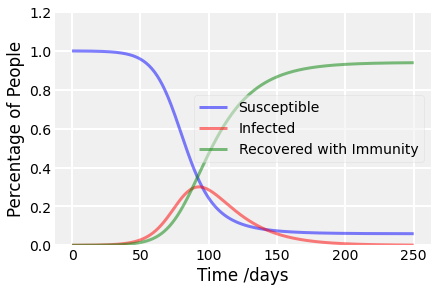

In [61]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import matplotlib.style as style
style.use('fivethirtyeight')

# Total population, N.
N = 5000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.15, 1./20 
# A grid of time points (in days)
t = np.linspace(0, 250, 250)


# first formula is negative of contact between susceptible and infected
# second formula is contact between infect and suscept minus recovered
# third is recovered
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=3, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=3, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=3, label='Recovered with Immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Percentage of People')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [62]:
#print(I.round())
print(R[-1].round())

4696.0


In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import matplotlib.style as style
style.use('fivethirtyeight')


def deriv(y, t, N, contact_rate, mean_recovery_rate):
    S, I, R = y
    dSdt = -contact_rate * S * I / N
    dIdt = contact_rate * S * I / N - mean_recovery_rate * I
    dRdt = mean_recovery_rate * I
    return dSdt, dIdt, dRdt


def ode(N=5000, time=150, I0=1, R0=0, contact_rate=0.25, mean_recovery_rate=0.1):
  S0 = N- I0 - R0
  t = np.linspace(0, time, time)
  y0 = S0, I0, R0

  ret = odeint(deriv, y0, t, args=(N, contact_rate, mean_recovery_rate))
  S, I, R = ret.T

  return S, I, R

In [0]:
total_infected = []
cont_rate = []
for i in range(0, 60, 1):
  S, I, R = ode(contact_rate=i/100)
  total_infected.append(R[-1].round())
  cont_rate.append(i/100)


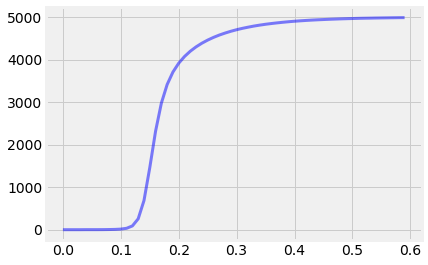

In [52]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(cont_rate, total_infected, 'b', alpha=0.5, lw=3, label='Susceptible')
plt.show()